**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: ALEJANDRO ELÍ ACOSTA FLORES
*   MATRÍCULA: ----------------------------------------------------

*   NOMBRE: JUAN CARLOS CRUZ MARTÍNEZ
*   MATRÍCULA: ----------------------------------------------------

*   NOMBRE: JAVIER MEJÍA MEDRANO
*   MATRÍCULA: ----------------------------------------------------

*   NOMBRE: JOSÉ LUIS LORENZO AUGUSTO GALÍNDEZ VENCES
*   MATRÍCULA: A01105695


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/Actividad6_FE"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime

In [4]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [6]:
# Elimina las columnas irrelevantes
columns_to_drop = ['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long']
cars_df_cleaned = cars_df.drop(columns=columns_to_drop)

# Muestra el DataFrame resultante
cars_df_cleaned

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [7]:
# Obtén el número de observaciones (filas) y columnas después del borrado
num_observations = cars_df_cleaned.shape[0]
num_columns = cars_df_cleaned.shape[1]

# Muestra las variables
num_observations, num_columns

(426880, 18)

## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [8]:
# Calcula el porcentaje de valores faltantes por columna
missing_percentage = cars_df_cleaned.isnull().mean() * 100

# Calcula el umbral para eliminar columnas con 30% o más de valores faltantes
threshold = len(cars_df_cleaned) * 0.7

# Elimina columnas que tienen menos del 70% de datos no faltantes
cars_df_reduced = cars_df_cleaned.dropna(axis=1, thresh=threshold)

# Calcula cuántas columnas se eliminaron
columns_eliminated = num_columns - cars_df_reduced.shape[1]

# Muestra la cantidad de columnas eliminadas
columns_eliminated

6

Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [9]:
# Calcula el porcentaje de valores faltantes por columna
missing_percentage_cols = cars_df_reduced.isnull().mean() * 100

# Selecciona las columnas con menos del 5% de NaN
columns_below_5_percent = missing_percentage_cols[missing_percentage_cols < 5].index.tolist()

# Cuenta el número de registros iniciales
initial_records = len(cars_df_reduced)

# Elimina filas con NaN en esas columnas
cars_df_final = cars_df_reduced.dropna(subset=columns_below_5_percent)

# Cuenta el número de registros eliminados
records_after_dropping = len(cars_df_final)
records_eliminated = initial_records - records_after_dropping

# Calcula el porcentaje de registros eliminados
percentage_deleted = (records_eliminated / initial_records) * 100

percentage_deleted

8.7321964017991

2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [10]:
# Definir listas de columnas
numeric_cols = cars_df_final.select_dtypes(include=['number']).columns
categorical_cols = cars_df_final.select_dtypes(include=['object']).columns

# Para columnas numéricas
for col in numeric_cols:
    cars_df_final.loc[:, col] = cars_df_final.loc[:, col].fillna(cars_df_final[col].mean())

# Para columnas categóricas
for col in categorical_cols:
    mode_value = cars_df_final[col].mode()[0]
    cars_df_final.loc[:, col] = cars_df_final.loc[:, col].fillna(mode_value)

In [11]:
print(numeric_cols)
print(categorical_cols)

Index(['price', 'year', 'odometer'], dtype='object')
Index(['region', 'region_url', 'manufacturer', 'model', 'fuel', 'title_status',
       'transmission', 'type', 'state'],
      dtype='object')


In [12]:
print(cars_df_final['price'].describe())

count    3.896040e+05
mean     6.395528e+04
std      1.144865e+07
min      0.000000e+00
25%      5.995000e+03
50%      1.399500e+04
75%      2.659000e+04
max      3.736929e+09
Name: price, dtype: float64


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

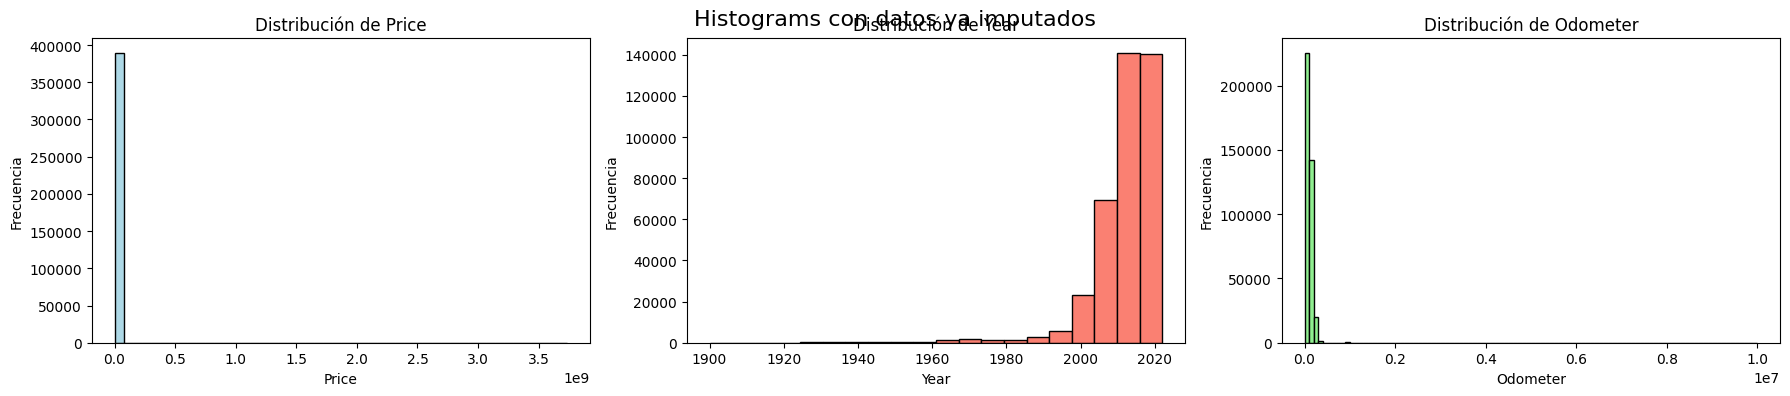

In [13]:
# Listado de columnas a graficar
# Puedes ajustar estas columnas según te interese
columns_to_plot = ['price', 'year', 'odometer']

# Crear la figura con 3 subplots en una fila y 3 columnas
plt.figure(figsize=(18, 4))

# Histograma de 'price'
plt.subplot(1, 3, 1)
plt.hist(cars_df_final['price'], bins=50, color='lightblue', edgecolor='black')
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')

# Histograma de 'year'
plt.subplot(1, 3, 2)
plt.hist(cars_df_final['year'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Year')
plt.xlabel('Year')
plt.ylabel('Frecuencia')

# Histograma de 'odometer'
plt.subplot(1, 3, 3)
plt.hist(cars_df_final['odometer'], bins=100, color='lightgreen', edgecolor='black')
plt.title('Distribución de Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.suptitle('Histograms con datos ya imputados', fontsize=16)
plt.show()

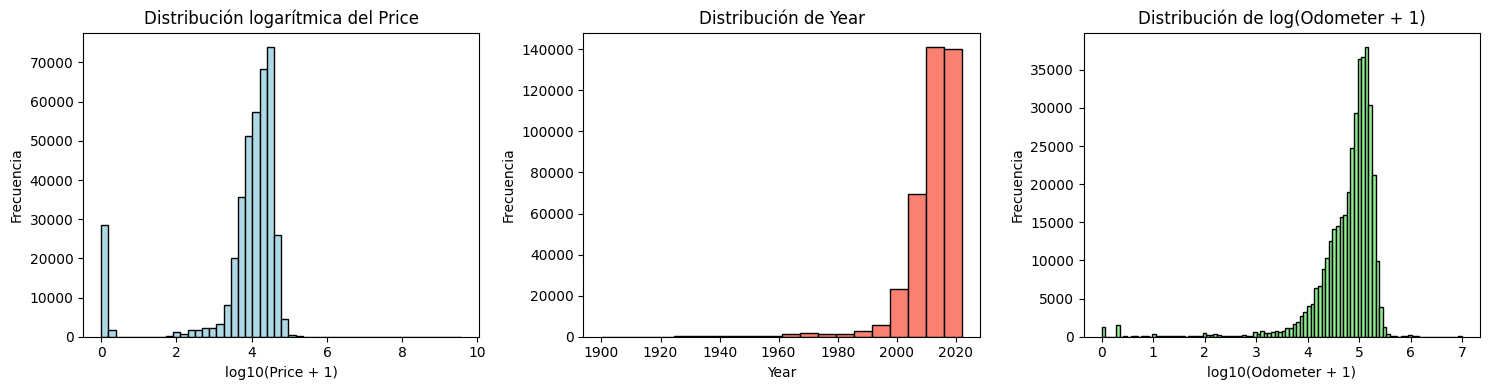

In [14]:
# APLICANDO ESCALAS LOGARITMICAS A LAS VARIABLES PRICE Y ODOMETER
#Este método es útil cuando los datos tienen una distribución muy sesgada a la derecha, es decir, la mayoría de los datos están en valores bajos, pero hay algunos muy altos.

import numpy as np
# Calcular log10(Price + 1)
log_prices = np.log10(cars_df_final['price'] + 1)

# Configurar tamaño y subplots (una fila y 3 columnas)
plt.figure(figsize=(15, 4))

# Histograma de log10(Price + 1)
plt.subplot(1, 3, 1)
plt.hist(log_prices, bins=50, color='lightblue', edgecolor='black')
plt.title('Distribución logarítmica del Price')
plt.xlabel('log10(Price + 1)')
plt.ylabel('Frecuencia')

# Histograma de Year
plt.subplot(1, 3, 2)
plt.hist(cars_df_final['year'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Year')
plt.xlabel('Year')
plt.ylabel('Frecuencia')

# Histograma de odometer log-transformado
plt.subplot(1, 3, 3)
log_odometer = np.log10(cars_df_final['odometer'] + 1)
plt.hist(log_odometer, bins=100, color='lightgreen', edgecolor='black')
plt.title('Distribución de log(Odometer + 1)')
plt.xlabel('log10(Odometer + 1)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

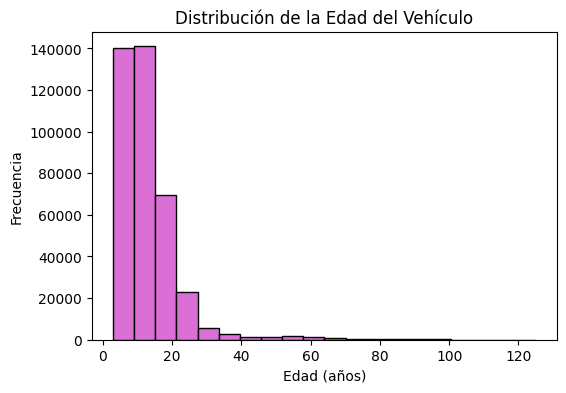

In [15]:
# Crear una copia del DataFrame para evitar advertencias
cars_df_final = cars_df_final.copy()

# Calcular la edad del vehículo si la columna 'year' existe
if 'year' in cars_df_final.columns:
    current_year = 2025
    cars_df_final['age'] = current_year - cars_df_final['year']

    # Eliminar la columna 'year'
    cars_df_final.drop(columns=['year'], inplace=True)
else:
    print("La columna 'year' no existe en el DataFrame.")

# Crear el histograma de 'age' si la columna existe
if 'age' in cars_df_final.columns:
    plt.figure(figsize=(6,4))
    plt.hist(cars_df_final['age'], bins=20, color='orchid', edgecolor='black')
    plt.title('Distribución de la Edad del Vehículo')
    plt.xlabel('Edad (años)')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("La columna 'age' no está disponible para graficar.")

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

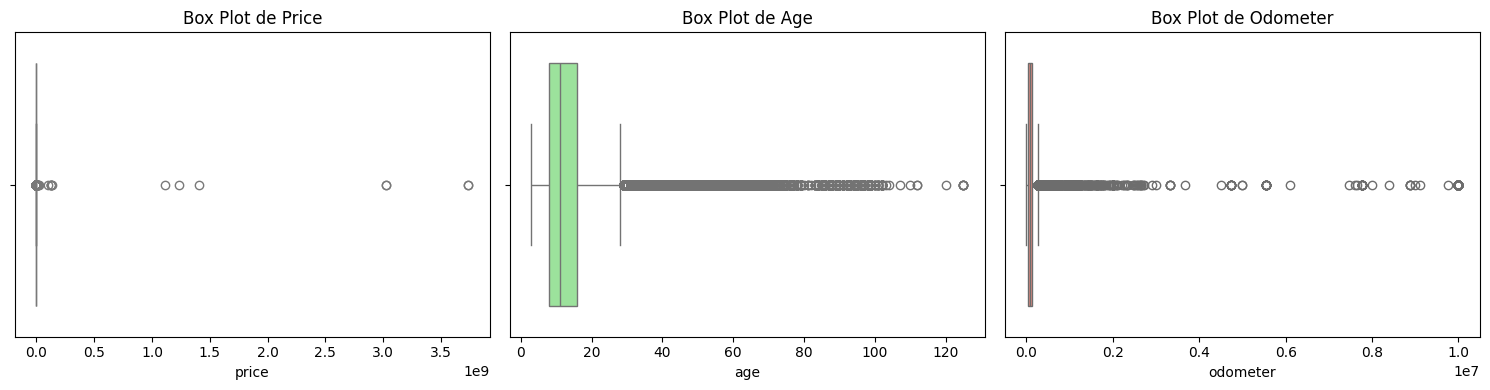

In [16]:
# Configurar tamaño de las figuras
plt.figure(figsize=(15, 4))

# Box plot para 'price'
plt.subplot(1, 3, 1)
sns.boxplot(x=cars_df_final['price'], color='lightblue')
plt.title('Box Plot de Price')

# Box plot para 'age'
plt.subplot(1, 3, 2)
sns.boxplot(x=cars_df_final['age'], color='lightgreen')
plt.title('Box Plot de Age')

# Box plot para 'odometer'
plt.subplot(1, 3, 3)
sns.boxplot(x=cars_df_final['odometer'], color='salmon')
plt.title('Box Plot de Odometer')

plt.tight_layout()
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [17]:
# Función para detectar outliers
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Calculando outliers para cada variable
outliers_price = get_outliers(cars_df_final, 'price')
outliers_age = get_outliers(cars_df_final, 'age')
outliers_odometer = get_outliers(cars_df_final, 'odometer')

# Porcentaje de outliers en cada variable
percent_outliers_price = len(outliers_price) / len(cars_df_final) * 100
percent_outliers_age = len(outliers_age) / len(cars_df_final) * 100
percent_outliers_odometer = len(outliers_odometer) / len(cars_df_final) * 100

# Imprimir porcentajes
print(f"Outliers en Price: {percent_outliers_price:.2f}%")
print(f"Outliers en Age: {percent_outliers_age:.2f}%")
print(f"Outliers en Odometer: {percent_outliers_odometer:.2f}%")

Outliers en Price: 1.71%
Outliers en Age: 3.65%
Outliers en Odometer: 0.83%


In [18]:
# Crear DataFrame sin outliers
df_sin_outliers = cars_df_final[
    (~cars_df_final.index.isin(get_outliers(cars_df_final, 'price').index)) &
    (~cars_df_final.index.isin(get_outliers(cars_df_final, 'age').index)) &
    (~cars_df_final.index.isin(get_outliers(cars_df_final, 'odometer').index))
]

# Calcular porcentaje total eliminado
registros_iniciales = len(cars_df_final)
registros_finales = len(df_sin_outliers)
registros_eliminados = registros_iniciales - registros_finales
porcentaje_eliminado = (registros_eliminados / registros_iniciales) * 100

print(f"Porcentaje total de registros eliminados: {porcentaje_eliminado:.2f}%")

Porcentaje total de registros eliminados: 5.97%


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

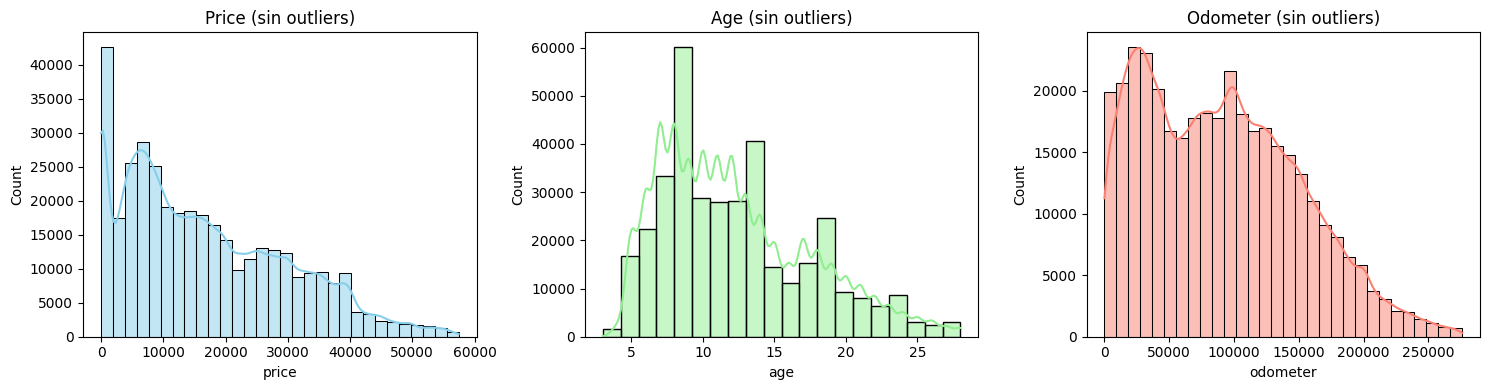

In [19]:

# Configurar tamaño de las gráficas
plt.figure(figsize=(15, 4))

# Histogramas de las variables sin outliers
# Price
plt.subplot(1, 3, 1)
sns.histplot(df_sin_outliers['price'], bins=30, kde=True, color='skyblue')
plt.title('Price (sin outliers)')

# Age
plt.subplot(1, 3, 2)
sns.histplot(df_sin_outliers['age'], bins=20, kde=True, color='lightgreen')
plt.title('Age (sin outliers)')

# Odometer
plt.subplot(1, 3, 3)
sns.histplot(df_sin_outliers['odometer'], bins=30, kde=True, color='salmon')
plt.title('Odometer (sin outliers)')

plt.tight_layout()
plt.show()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


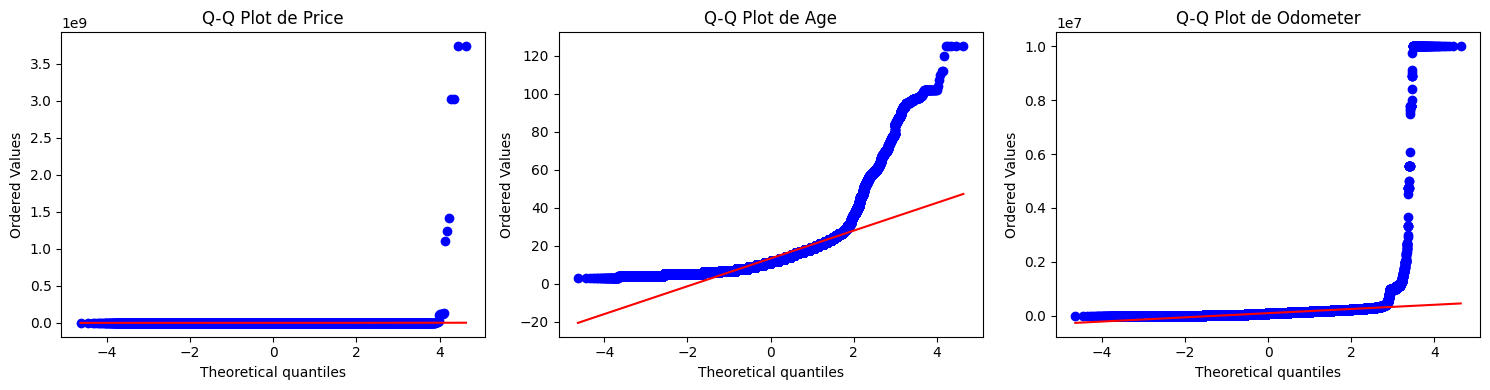

In [20]:
# Crear gráfico Q-Q para 'price'
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
stats.probplot(cars_df_final['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot de Price')

# Gráfico Q-Q para 'age'
plt.subplot(1, 3, 2)
stats.probplot(cars_df_final['age'], dist="norm", plot=plt)
plt.title('Q-Q Plot de Age')

# Gráfico Q-Q para 'odometer'
plt.subplot(1, 3, 3)
stats.probplot(cars_df_final['odometer'], dist="norm", plot=plt)
plt.title('Q-Q Plot de Odometer')

plt.tight_layout()
plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [21]:
from sklearn.preprocessing import PowerTransformer
# Selecciona las variables a transformar
variables = ['price', 'age', 'odometer']

# Crear y ajustar el transformador Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(cars_df_final[variables])

# Crear un nuevo DataFrame con las variables transformadas
transf_df = pd.DataFrame(transformed_data, columns=variables, index=cars_df_final.index)

# Mostrar los primeros registros transformados
transf_df.head()

,price,age,odometer
27,0.891537,-0.038203,-0.259527
28,0.541526,0.584145,-0.049171
29,1.047459,-1.920455,-1.158154
30,0.817506,-0.747898,-0.575976
31,0.216243,0.143239,0.637440


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

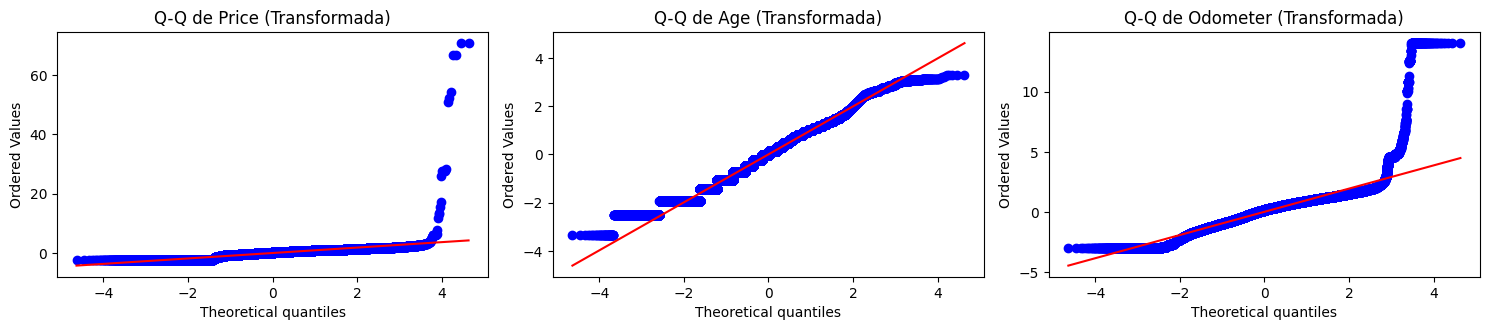

In [22]:

# Crear gráficos Q-Q para las variables transformadas
plt.figure(figsize=(15, 6))

# Q-Q para 'price'
plt.subplot(2, 3, 1)
stats.probplot(transf_df['price'], dist="norm", plot=plt)
plt.title('Q-Q de Price (Transformada)')

# Q-Q para 'age'
plt.subplot(2, 3, 2)
stats.probplot(transf_df['age'], dist="norm", plot=plt)
plt.title('Q-Q de Age (Transformada)')

# Q-Q para 'odometer'
plt.subplot(2, 3, 3)
stats.probplot(transf_df['odometer'], dist="norm", plot=plt)
plt.title('Q-Q de Odometer (Transformada)')

plt.tight_layout()
plt.show()

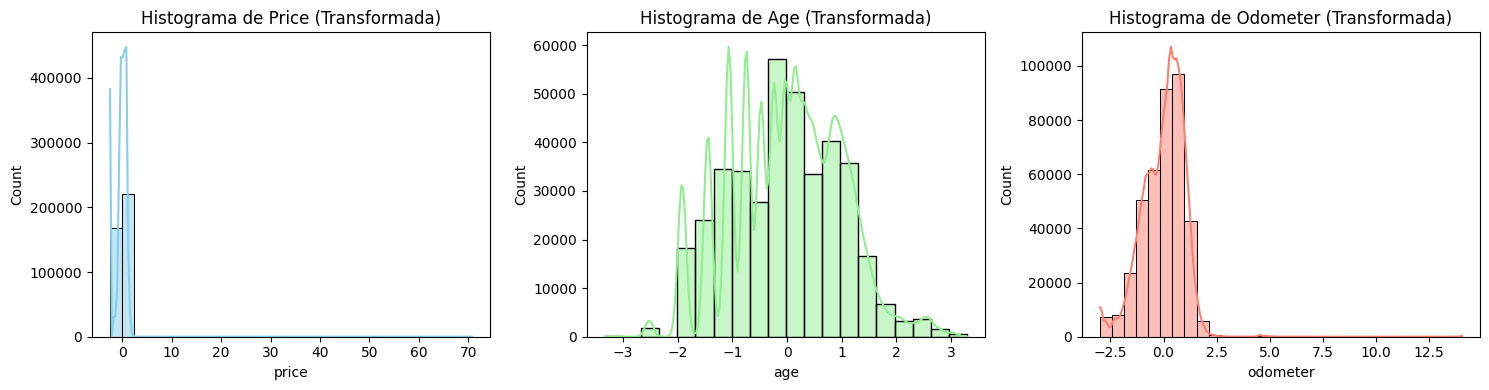

In [23]:
# Crear histogramas para las variables transformadas
plt.figure(figsize=(15, 4))

# Histograma de 'price'
plt.subplot(1, 3, 1)
sns.histplot(transf_df['price'], bins=30, kde=True, color='skyblue')
plt.title('Histograma de Price (Transformada)')

# Histograma de 'age'
plt.subplot(1, 3, 2)
sns.histplot(transf_df['age'], bins=20, kde=True, color='lightgreen')
plt.title('Histograma de Age (Transformada)')

# Histograma de 'odometer'
plt.subplot(1, 3, 3)
sns.histplot(transf_df['odometer'], bins=30, kde=True, color='salmon')
plt.title('Histograma de Odometer (Transformada)')

plt.tight_layout()
plt.show()

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Crear el scaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos
minmax_data = scaler.fit_transform(transf_df)

# Crear el DataFrame resultante
minmax_df = pd.DataFrame(minmax_data, columns=transf_df.columns, index=transf_df.index)

# Mostrar los primeros registros
minmax_df.head()

,price,age,odometer
27,0.045552,0.497363,0.160245
28,0.040766,0.591354,0.172604
29,0.047683,0.213096,0.107449
30,0.044540,0.390181,0.141653
31,0.036319,0.524766,0.212944


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

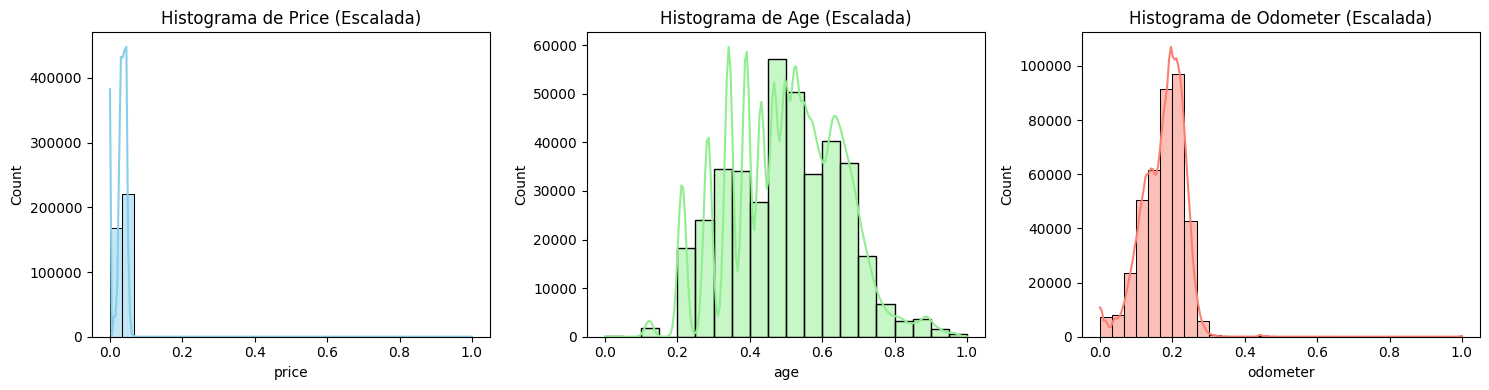

In [25]:
# Crear histogramas para las variables escaladas
plt.figure(figsize=(15, 4))

# Histograma de 'price'
plt.subplot(1, 3, 1)
sns.histplot(minmax_df['price'], bins=30, kde=True, color='skyblue')
plt.title('Histograma de Price (Escalada)')

# Histograma de 'age'
plt.subplot(1, 3, 2)
sns.histplot(minmax_df['age'], bins=20, kde=True, color='lightgreen')
plt.title('Histograma de Age (Escalada)')

# Histograma de 'odometer'
plt.subplot(1, 3, 3)
sns.histplot(minmax_df['odometer'], bins=30, kde=True, color='salmon')
plt.title('Histograma de Odometer (Escalada)')

plt.tight_layout()
plt.show()

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [26]:
# Seleccionar variables categóricas
categorical_vars = cars_df_final.select_dtypes(include=['object'])

# Obtener el resumen estadístico de las variables categóricas
categorical_summary = categorical_vars.describe()

# Mostrar el resumen
print(categorical_summary)

          region                   region_url manufacturer   model    fuel  \
count     389604                       389604       389604  389604  389604   
unique       404                          413           41   21866       5   
top     columbus  https://reno.craigslist.org         ford   f-150     gas   
freq        3334                         2852        67811    7786  329679   

       title_status transmission    type   state  
count        389604       389604  389604  389604  
unique            6            3      13      51  
top           clean    automatic   sedan      ca  
freq         377138       309260  163604   45131  


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [27]:
# Seleccionar variables categóricas
categorical_vars = cars_df_final.select_dtypes(include=['object'])

# Inicializar las listas
highly_cardinal_variables = []
few_cardinal_variables = []

# Definir el umbral de alta cardinalidad
threshold = 100

# Clasificar las variables
for col in categorical_vars.columns:
    unique_count = categorical_vars[col].nunique()
    if unique_count >= threshold:
        highly_cardinal_variables.append(col)
    else:
        few_cardinal_variables.append(col)

# Mostrar los resultados
print("Variables de alta cardinalidad:", highly_cardinal_variables)
print("Variables de baja cardinalidad:", few_cardinal_variables)

Variables de alta cardinalidad: ['region', 'region_url', 'model']
Variables de baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

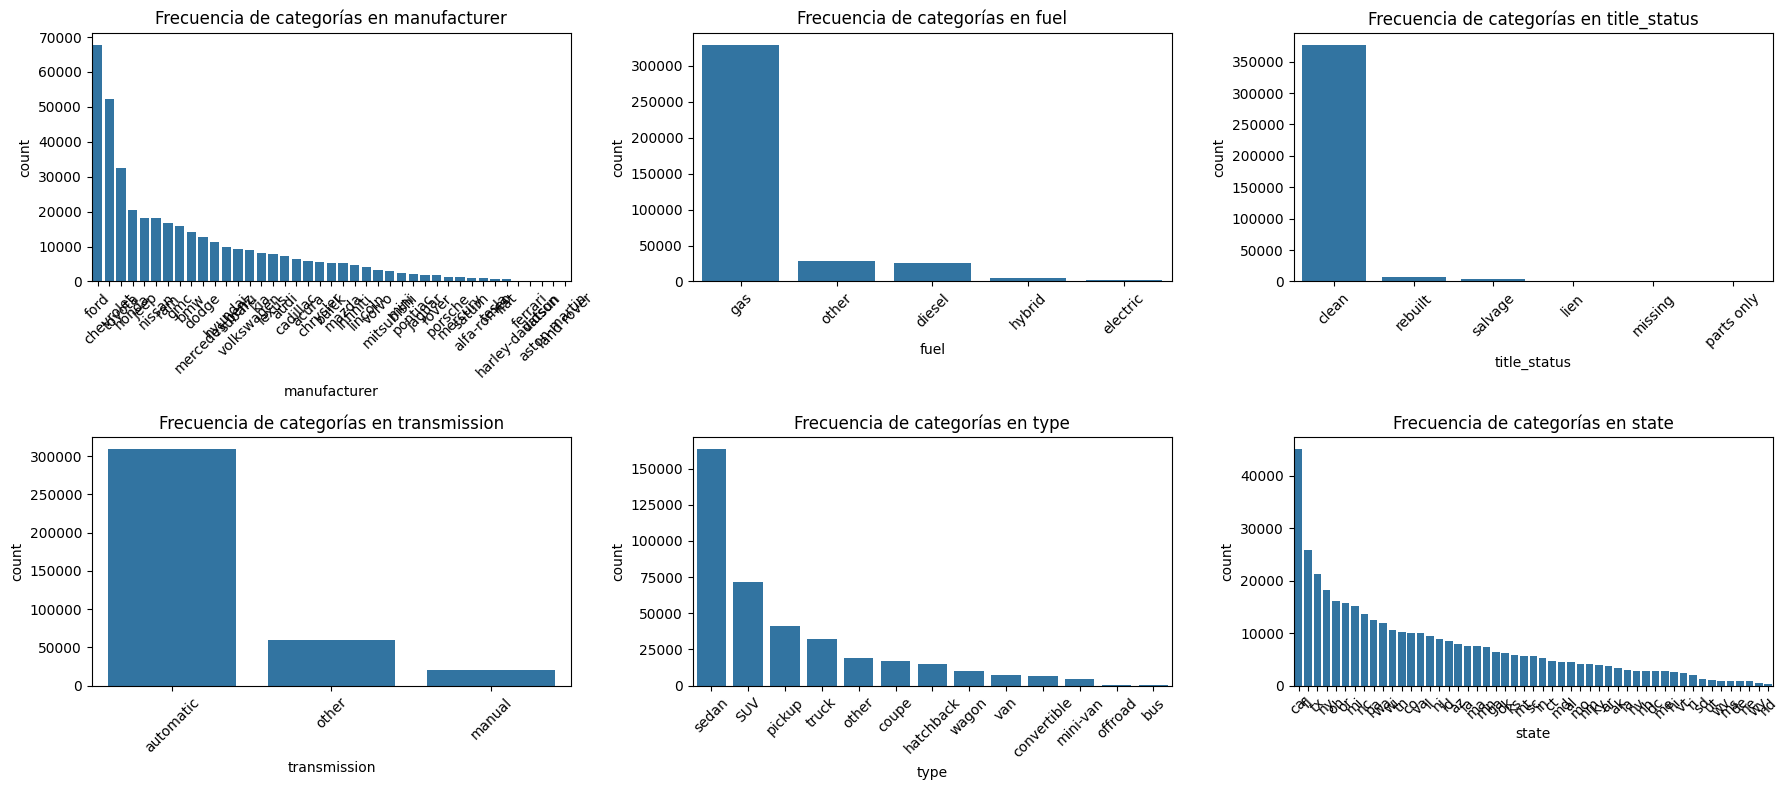

In [28]:
# Número de variables a graficar
n_vars = len(few_cardinal_variables)

# Configurar la figura con subplots 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar el acceso

for i, col in enumerate(few_cardinal_variables):
    if i < 6:  # Para limitar a 6 gráficas (2 filas x 3 columnas)
        sns.countplot(data=cars_df_final, x=col, order=cars_df_final[col].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Frecuencia de categorías en {col}')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        # En caso de tener más de 6 variables, estos no serán graficados
        print(f"Variable {col} será omitida por el diseño de 3x2.")

plt.tight_layout()
plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [29]:
# Aplicar one-hot encoding a las variables de baja cardinalidad
onehot_df = pd.get_dummies(cars_df_final, columns=few_cardinal_variables, drop_first=True)

# Mostrar las primeras filas del resultado
onehot_df.head()

,region,region_url,price,model,odometer,age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
27,auburn,https://auburn.craigslist.org,33590,sierra 1500 crew cab slt,57923.0,11.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28,auburn,https://auburn.craigslist.org,22590,silverado 1500,71229.0,15.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29,auburn,https://auburn.craigslist.org,39590,silverado 1500 crew,19160.0,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30,auburn,https://auburn.craigslist.org,30990,tundra double cab sr,41124.0,8.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31,auburn,https://auburn.craigslist.org,15000,f-150 xlt,128000.0,12.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [30]:
# Lista de las columnas que quieres revisar
columnas_a_ver = ['region', 'region_url', 'model']

# Selecciona esas columnas y muestra las primeras filas
print(cars_df_final[columnas_a_ver].head())

    region                     region_url                     model
27  auburn  https://auburn.craigslist.org  sierra 1500 crew cab slt
28  auburn  https://auburn.craigslist.org            silverado 1500
29  auburn  https://auburn.craigslist.org       silverado 1500 crew
30  auburn  https://auburn.craigslist.org      tundra double cab sr
31  auburn  https://auburn.craigslist.org                 f-150 xlt


In [31]:
# -------------------- ANOTADOR DE REVISIÓN ---------------------------
# binary_df = pd.get_dummies(cars_df_final[highly_cardinal_variables], drop_first=False)
# Usa demasiada ram por la cantidad de categorias
# ---------------------------------------------------------------------

binary_df = pd.DataFrame()

for col in highly_cardinal_variables:
    # Chequear si tiene exactamente 2 categorías
    if cars_df_final[col].nunique() == 2:
        # Crear variable binaria (0/1) usando map
        enum = cars_df_final[col].astype('category').cat.codes
        binary_df[col] = enum
    else:
        print(f"{col} no tiene exactamente 2 categorías, se omite.")

region no tiene exactamente 2 categorías, se omite.
region_url no tiene exactamente 2 categorías, se omite.
model no tiene exactamente 2 categorías, se omite.


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [32]:
# Restablecer los índices de todos los DataFrames
minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)

# Concatenar los DataFrames
final_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)

# Mostrar las primeras filas del resultado
final_df.head()

,price,age,odometer,region,region_url,price,model,odometer,age,manufacturer_alfa-romeo,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.045552,0.497363,0.160245,auburn,https://auburn.craigslist.org,33590,sierra 1500 crew cab slt,57923.0,11.0,False,...,False,False,False,False,False,False,False,False,False,False
1,0.040766,0.591354,0.172604,auburn,https://auburn.craigslist.org,22590,silverado 1500,71229.0,15.0,False,...,False,False,False,False,False,False,False,False,False,False
2,0.047683,0.213096,0.107449,auburn,https://auburn.craigslist.org,39590,silverado 1500 crew,19160.0,5.0,False,...,False,False,False,False,False,False,False,False,False,False
3,0.044540,0.390181,0.141653,auburn,https://auburn.craigslist.org,30990,tundra double cab sr,41124.0,8.0,False,...,False,False,False,False,False,False,False,False,False,False
4,0.036319,0.524766,0.212944,auburn,https://auburn.craigslist.org,15000,f-150 xlt,128000.0,12.0,False,...,False,False,False,False,False,False,False,False,False,False
